<CENTER><img src="http://opendata.atlas.cern/DataAndTools/pictures/ATLASOD.gif" style="width:50%"></CENTER>

<CENTER><h1>Searching for the Higgs boson in the H&#8594;&gamma;&gamma; channel</h1></CENTER>
## Python notebook example

**Introduction**
Let's take a current ATLAS Open Data sample and create a histogram:

In [108]:
import ROOT
from ROOT import TMath
import time
from ROOT import TCanvas, TFile, TPaveText, TGraphErrors, TPad, TF1, TH1F
from ROOT import gROOT, gBenchmark
from array import array

In [109]:
start = time.time()

Because we would like to use more than one ROOT input file, the best option is to use a TChain object. This allows to "chain" several samples into a single structure that we can later loop over

In [120]:
canvas = ROOT.TCanvas("Canvas","cz",1000,1000)
canvas.cd()

n_bins = 50


#pad1.cd()

tree = f.Get("mini")
hist = ROOT.TH1F("h_M_Hyy","Invariant Mass of di-photon system ; Invariant Mass m_{yy} [GeV] ; events",n_bins,80,280)

n_read = 10000

Photon_1 = ROOT.TLorentzVector()
Photon_2 = ROOT.TLorentzVector()
#n = 0
for n, event in enumerate(tree):
    #####n += 1
    ## printing the evolution in number of events
    #if(n % (n_read / 500) == 0):
    if(n % 100000 == 0):
        print(n)
    if( n > n_read ):
        break
    ## checking the trigger    
    if(tree.trigP):
        goodphoton_index = [0]*5
        goodphoton_n = 0
        photon_index = 0
        ##            
        j=0
        ## looping the photons per event
        for j in range(tree.photon_n):
            ##
            if(tree.photon_isTightID[j]):
                ##
                if(tree.photon_pt[j] > 25000 and (TMath.Abs(tree.photon_eta[j]) < 2.37)\
                   and (TMath.Abs(tree.photon_eta[j]) < 1.37 or TMath.Abs(tree.photon_eta[j]) > 1.52)):
                    ##
                    goodphoton_n += 1  #count
                    goodphoton_index[photon_index]=j
                    photon_index += 1
                ## end Pt and eta pre-selection
            ## end on request of quality of the photon
        ## end looping photons in the current event
            
        ## Using the two selected photons
        if(goodphoton_n==2):
            ##
            goodphoton1_index = goodphoton_index[0]
            goodphoton2_index = goodphoton_index[1]
            ## Getting couple of photons with good isolation 
            if((tree.photon_ptcone30[goodphoton1_index]/tree.photon_pt[goodphoton1_index] < 0.065)\
               and (tree.photon_etcone20[goodphoton1_index] / tree.photon_pt[goodphoton1_index] < 0.065)):
                ##
                if((tree.photon_ptcone30[goodphoton2_index]/tree.photon_pt[goodphoton2_index] < 0.065)\
                   and (tree.photon_etcone20[goodphoton2_index] / tree.photon_pt[goodphoton2_index] < 0.065)):
                    ##
                    Photon_1.SetPtEtaPhiE(tree.photon_pt[goodphoton1_index]/1000., tree.photon_eta[goodphoton1_index],\
                                          tree.photon_phi[goodphoton1_index],tree.photon_E[goodphoton1_index]/1000.)
                    Photon_2.SetPtEtaPhiE(tree.photon_pt[goodphoton2_index]/1000., tree.photon_eta[goodphoton2_index],\
                                          tree.photon_phi[goodphoton2_index],tree.photon_E[goodphoton2_index]/1000.)
                    ## Adding the two TLorentz vectors
                    Photon_12 = Photon_1 + Photon_2
                    ## Filling with the mass of the gamma-gamma system
                    hist.Fill(Photon_12.M())
                ## end isolation photon #2
            ## end isolation photon #1
        ## end 2-good photons
    ## end of trigger request
## End loop in the events

hist.Draw()
#canvas.Draw()


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: Canvas
TWebFile::Append:0: RuntimeWarning: Replacing existing TH1: h_M_Hyy (Potential memory leak).


0


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: Canvas
TWebFile::Append:0: RuntimeWarning: Replacing existing TH1: h_M_Hyy (Potential memory leak).


0
0


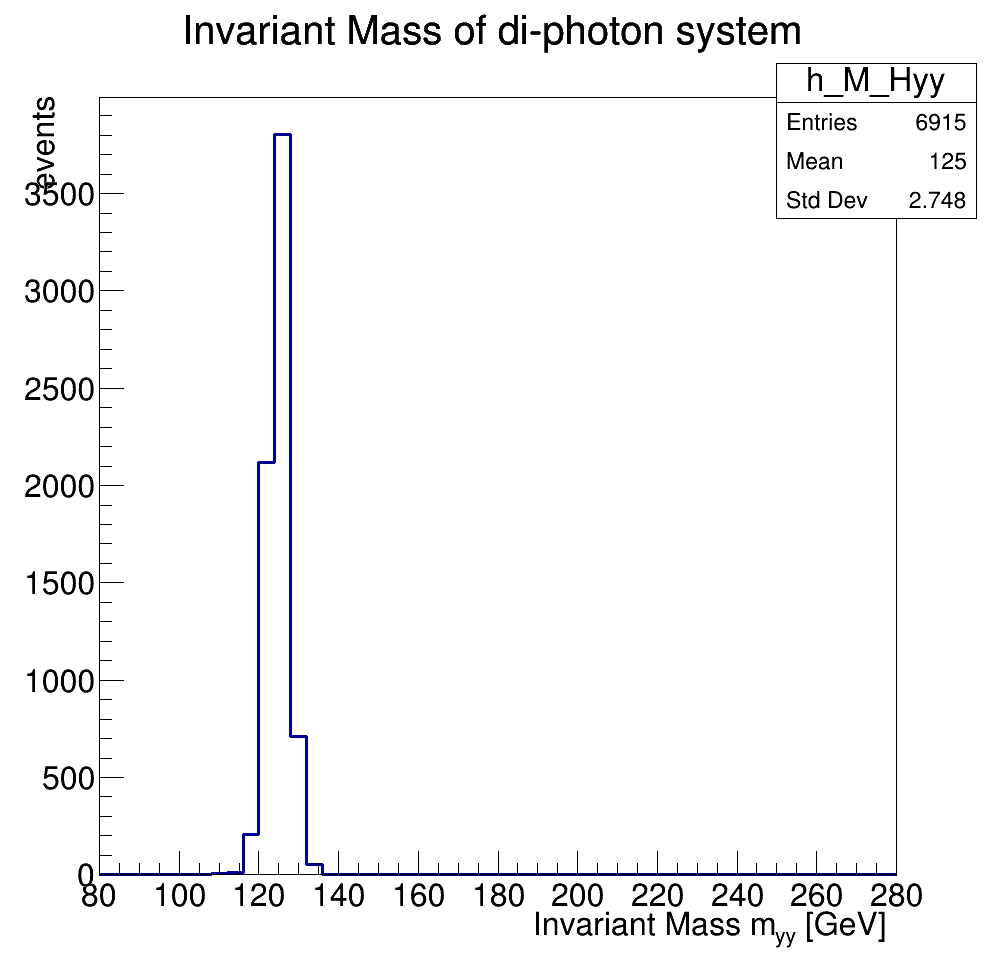

In [121]:
canvas = ROOT.TCanvas("Canvas","cz",1000,1000)
canvas.cd()

n_bins = 50

pad1 = TPad( 'pad2', 'The pad with the histogram', 0.03, 0, 0.97, 0.25, 21 )
pad2 = TPad( 'pad1', 'The pad with the function',  0.03, 0.30, 0.97, 0.55, 21 )
pad3 = TPad( 'pad3', 'The pad with the histogram', 0.03, 0.60, 0.97, 0.85, 21 )

pad1.Draw()
pad2.Draw()
pad3.Draw()

#pad1.cd()

tree = f.Get("mini")
hist = ROOT.TH1F("h_M_Hyy","Invariant Mass of di-photon system ; Invariant Mass m_{yy} [GeV] ; events",n_bins,80,280)

n_read = 10000

Photon_1 = ROOT.TLorentzVector()
Photon_2 = ROOT.TLorentzVector()
#n = 0
for n, event in enumerate(tree):
    #####n += 1
    ## printing the evolution in number of events
    #if(n % (n_read / 500) == 0):
    if(n % 100000 == 0):
        print(n)
    if( n > n_read ):
        break
    ## checking the trigger    
    if(tree.trigP):
        goodphoton_index = [0]*5
        goodphoton_n = 0
        photon_index = 0
        ##            
        j=0
        ## looping the photons per event
        for j in range(tree.photon_n):
            ##
            if(tree.photon_isTightID[j]):
                ##
                if(tree.photon_pt[j] > 25000 and (TMath.Abs(tree.photon_eta[j]) < 2.37)\
                   and (TMath.Abs(tree.photon_eta[j]) < 1.37 or TMath.Abs(tree.photon_eta[j]) > 1.52)):
                    ##
                    goodphoton_n += 1  #count
                    goodphoton_index[photon_index]=j
                    photon_index += 1
                ## end Pt and eta pre-selection
            ## end on request of quality of the photon
        ## end looping photons in the current event
            
        ## Using the two selected photons
        if(goodphoton_n==2):
            ##
            goodphoton1_index = goodphoton_index[0]
            goodphoton2_index = goodphoton_index[1]
            ## Getting couple of photons with good isolation 
            if((tree.photon_ptcone30[goodphoton1_index]/tree.photon_pt[goodphoton1_index] < 0.065)\
               and (tree.photon_etcone20[goodphoton1_index] / tree.photon_pt[goodphoton1_index] < 0.065)):
                ##
                if((tree.photon_ptcone30[goodphoton2_index]/tree.photon_pt[goodphoton2_index] < 0.065)\
                   and (tree.photon_etcone20[goodphoton2_index] / tree.photon_pt[goodphoton2_index] < 0.065)):
                    ##
                    Photon_1.SetPtEtaPhiE(tree.photon_pt[goodphoton1_index]/1000., tree.photon_eta[goodphoton1_index],\
                                          tree.photon_phi[goodphoton1_index],tree.photon_E[goodphoton1_index]/1000.)
                    Photon_2.SetPtEtaPhiE(tree.photon_pt[goodphoton2_index]/1000., tree.photon_eta[goodphoton2_index],\
                                          tree.photon_phi[goodphoton2_index],tree.photon_E[goodphoton2_index]/1000.)
                    ## Adding the two TLorentz vectors
                    Photon_12 = Photon_1 + Photon_2
                    ## Filling with the mass of the gamma-gamma system
                    hist.Fill(Photon_12.M())
                ## end isolation photon #2
            ## end isolation photon #1
        ## end 2-good photons
    ## end of trigger request
## End loop in the events

hist.Draw()
#canvas.Draw()


#pad2.cd()

md_data = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/2019/GamGam/MC/mc15_13TeV.343981.PwPy8EG_NNLOPS_nnlo_30_ggH125_gamgam.gamgam_raw.root")
tree2 = md_data.Get("mini")
hist2 = ROOT.TH1F("h_M_Hyy","Invariant Mass of di-photon system ; Invariant Mass m_{yy} [GeV] ; events",n_bins,80,280)


Photon_1 = ROOT.TLorentzVector()
Photon_2 = ROOT.TLorentzVector()
#n = 0
for n, event in enumerate(tree2):
    #####n += 1
    ## printing the evolution in number of events
    #if(n % (n_read / 500) == 0):
    if(n % 100000 == 0):
        print(n)
    if( n > n_read ):
        break
    ## checking the trigger    
    if(tree2.trigP):
        goodphoton_index = [0]*5
        goodphoton_n = 0
        photon_index = 0
        ##            
        j=0
        ## looping the photons per event
        for j in range(tree2.photon_n):
            ##
            if(tree2.photon_isTightID[j]):
                ##
                if(tree2.photon_pt[j] > 25000 and (TMath.Abs(tree2.photon_eta[j]) < 2.37)\
                   and (TMath.Abs(tree2.photon_eta[j]) < 1.37 or TMath.Abs(tree2.photon_eta[j]) > 1.52)):
                    ##
                    goodphoton_n += 1  #count
                    goodphoton_index[photon_index]=j
                    photon_index += 1
                ## end Pt and eta pre-selection
            ## end on request of quality of the photon
        ## end looping photons in the current event
            
        ## Using the two selected photons
        if(goodphoton_n==2):
            ##
            goodphoton1_index = goodphoton_index[0]
            goodphoton2_index = goodphoton_index[1]
            ## Getting couple of photons with good isolation 
            if((tree2.photon_ptcone30[goodphoton1_index]/tree2.photon_pt[goodphoton1_index] < 0.065)\
               and (tree2.photon_etcone20[goodphoton1_index] / tree2.photon_pt[goodphoton1_index] < 0.065)):
                ##
                if((tree2.photon_ptcone30[goodphoton2_index]/tree2.photon_pt[goodphoton2_index] < 0.065)\
                   and (tree2.photon_etcone20[goodphoton2_index] / tree2.photon_pt[goodphoton2_index] < 0.065)):
                    ##
                    Photon_1.SetPtEtaPhiE(tree2.photon_pt[goodphoton1_index]/1000., tree2.photon_eta[goodphoton1_index],\
                                          tree2.photon_phi[goodphoton1_index],tree2.photon_E[goodphoton1_index]/1000.)
                    Photon_2.SetPtEtaPhiE(tree2.photon_pt[goodphoton2_index]/1000., tree2.photon_eta[goodphoton2_index],\
                                          tree2.photon_phi[goodphoton2_index],tree2.photon_E[goodphoton2_index]/1000.)
                    ## Adding the two TLorentz vectors
                    Photon_12 = Photon_1 + Photon_2
                    ## Filling with the mass of the gamma-gamma system
                    hist2.Fill(Photon_12.M())
                ## end isolation photon #2
            ## end isolation photon #1
        ## end 2-good photons
    ## end of trigger request
## End loop in the events


hist2.Draw()
canvas.Draw()

In [ ]:
for i in hist:

#### Final plot

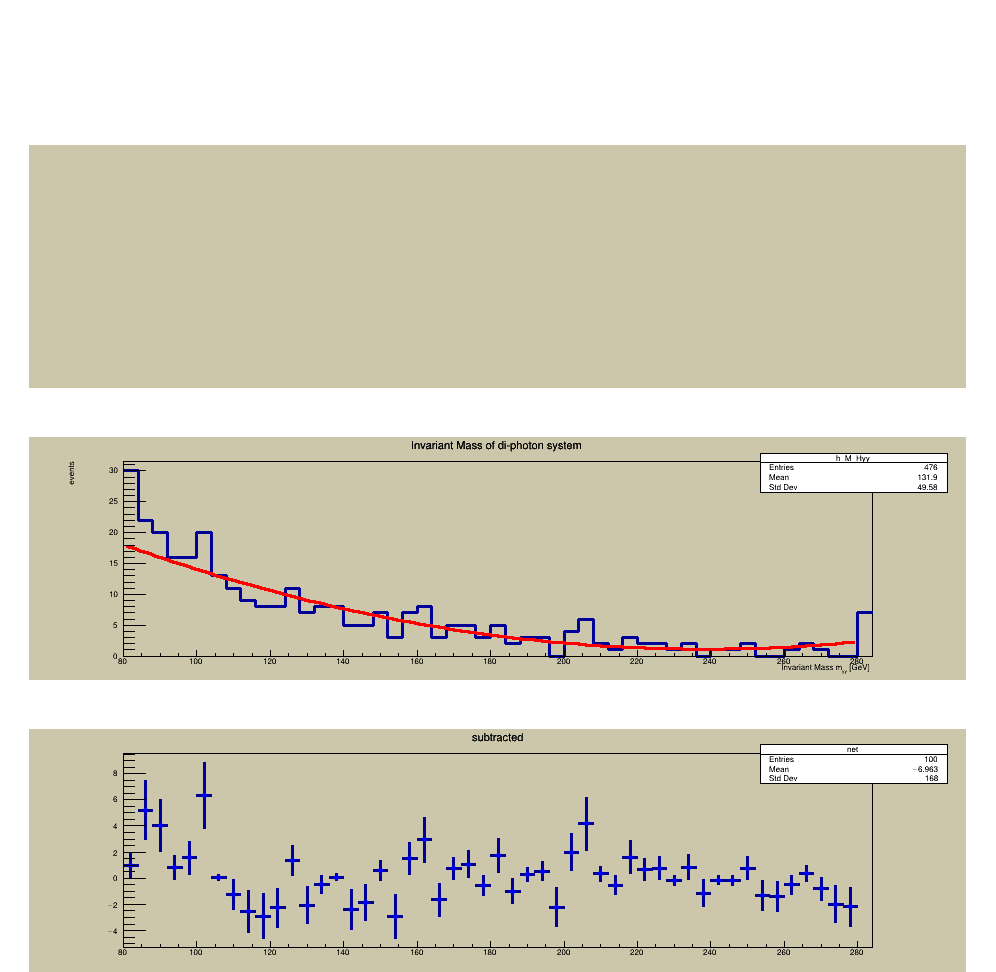


****************************************
Minimizer is Linear
Chi2                      =      28.7539
NDf                       =           41
p0                        =      39.4443   +/-   4.27226     
p1                        =     -0.32154   +/-   0.0452706   
p2                        =  0.000674511   +/-   0.000115676 


In [33]:
#fitResultPtr2 = hist.Fit('gaus')
pad1.cd()

#specific_range = (105,  160)
specific_range = (80,  280)
g1 = TF1( 'g1', 'pol2',  specific_range[0],  specific_range[1] )
#fitResultPtr = hist.Fit("pol3","S")
#fitResultPtr2 = hist.Fit("gaus","S")

#hist.Fit( g1, 'gaus' )
hist.Fit( g1, 'R' )
#hist.Fit( g1, 'pol1' )

#chi2_nparams = (fitResultPtr.Chi2(), fitResultPtr.NFreeParameters())
#print "The final Chi2 value was %.2f and the number of free parameters was %d" %chi2_nparams
#fitResultPtr.Draw()
#fitResultPtr2.Draw()
g1.GetParameters()
#g1.Draw()


hist.SetAxisRange(specific_range[0],  specific_range[1])

pad2.cd()


param0, param1, param2 = g1.GetParameters()[0], g1.GetParameters()[1], g1.GetParameters()[2]

def fitFunc(x):
    return (x**2)*param2 + (x**1)*param1 + param0

net = TH1F("net","subtracted",hist.GetNbinsX(),80,280)
for i in range(1,hist.GetNbinsX()+1):
    x=hist.GetBinCenter(i)
    y=fitFunc(x)    
    net.SetBinContent(i,hist.GetBinContent(i)-y)
    #print(hist.GetBinContent(i)-y)
    #print(hist.GetBinContent(i)-y)
    net.SetBinContent(1,1)
net.SetAxisRange(specific_range[0],  specific_range[1])
net.Draw('E')



canvas.Draw()

